In [3]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('Health.csv')

X = df.iloc [:,0:3]  # X is independent variable
y = df.iloc [:,3]   #dependent variable

print(X)
print(y)



  Ethnicity  Height (CM)  Weight (Kg)
0     White        186.0         90.0
1   African        185.0         98.0
2     Asian        175.0         80.0
3     White        180.0         88.0
4     Asian        178.0          NaN
5     Asian        172.0         72.0
6   African        178.0         75.0
7     White          NaN         89.0
8   African        186.0         90.0
0    Yes
1     No
2     No
3    Yes
4     No
5    Yes
6     No
7    Yes
8    Yes
Name: Will survive till 70, dtype: object


In [4]:
#==============================================================================
# Handle the missing values, we can see that in dataset there are some missing
# values, we will use strategy to impute mean of column values in these places
#==============================================================================

from sklearn.impute import SimpleImputer
# First create an Imputer , Stratergy means what we want to write in place of missed value
missingValueImputer = SimpleImputer (missing_values = np.nan, strategy = 'mean')  #if missing values are represented by 9999 then write same here
# Set which columns imputer should perform   # update values of X with new values

X.iloc[:,1:3] = missingValueImputer.fit_transform (X.iloc[:,1:3])


print(X)
print(y)

  Ethnicity  Height (CM)  Weight (Kg)
0     White        186.0        90.00
1   African        185.0        98.00
2     Asian        175.0        80.00
3     White        180.0        88.00
4     Asian        178.0        85.25
5     Asian        172.0        72.00
6   African        178.0        75.00
7     White        180.0        89.00
8   African        186.0        90.00
0    Yes
1     No
2     No
3    Yes
4     No
5    Yes
6     No
7    Yes
8    Yes
Name: Will survive till 70, dtype: object


In [5]:

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X.iloc[:, 0] = X_labelencoder.fit_transform(X.iloc[:, 0])
print (X)

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

X = independent_scalar.fit_transform(X)
print(X)


   Ethnicity  Height (CM)  Weight (Kg)
0          2        186.0        90.00
1          0        185.0        98.00
2          1        175.0        80.00
3          2        180.0        88.00
4          1        178.0        85.25
5          1        172.0        72.00
6          0        178.0        75.00
7          2        180.0        89.00
8          0        186.0        90.00
[1 0 0 1 0 1 0 1 1]
[[ 1.22474487  1.29232469  0.61464681]
 [-1.22474487  1.07693724  1.64984143]
 [ 0.         -1.07693724 -0.67934647]
 [ 1.22474487  0.          0.35584815]
 [ 0.         -0.4307749   0.        ]
 [ 0.         -1.72309958 -1.71454109]
 [-1.22474487 -0.4307749  -1.32634311]
 [ 1.22474487  0.          0.48524748]
 [-1.22474487  1.29232469  0.61464681]]


In [7]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
#print(X)
#==============================================================================
# Encode the categorial data. So now instead of character values we will have
# corresponding numerical values
#==============================================================================
X_train

array([[-1.02899151,  0.88159065,  1.48988518],
       [ 0.17149859, -0.55834074, -0.02546812],
       [-1.02899151,  1.08729513,  0.53907526],
       [-1.02899151, -0.55834074, -1.24369333],
       [ 1.37198868, -0.14693177,  0.30137279],
       [ 1.37198868,  1.08729513,  0.53907526],
       [ 0.17149859, -1.79256765, -1.60024704]])

In [11]:
#principal component analysis is a dimensionality reduction technique 
#i.e. given 10 input features,
#it will produce a smaller number of independent features., 
#it maximizes the variances. 

from sklearn.decomposition import PCA

pc = PCA(n_components=2)
X_pca=pc.fit_transform(X_train)
#X_pca = pc.transform(X)
#print(X_pca)

#print("original shape:   ", X.shape)  # (9,3)#print("transformed shape:", X_pca.shape) #(9,2) when n_components =2 
#returns a vector of the variance explained by each dimension
print(pc.explained_variance_ratio_)   # 61% data belongs to first axis and 33% data belongs to the second axis and remaining belongs to others




#plt.plot(pc.explained_variance_ratio_)

#plt.show()
X_pca


[0.62091604 0.33391978]


array([[-1.7331777 , -0.89485498],
       [ 0.42293782,  0.17437397],
       [-1.20897496, -0.98582458],
       [ 1.21092155, -1.13452163],
       [-0.02822152,  1.39563236],
       [-1.06877623,  1.40453238],
       [ 2.40529105,  0.04066248]])

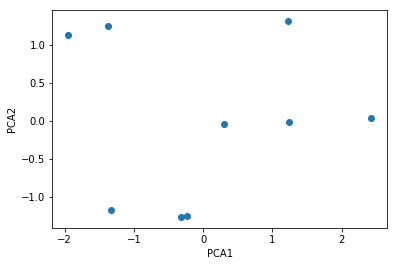

In [10]:
df = pd.DataFrame(X_pca,columns = ['PCA1','PCA2'])
#print(df)
#print(df.iloc[:,0])

#plt.plot(df)

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker='o');  #'o', '.', ',', 'x', '+'

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()